## KMeans clustering algorithm:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('dark_background')

In [2]:
from sklearn.datasets import make_blobs

### importing data:

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)
X.shape

(1000, 2)

### Initial state:

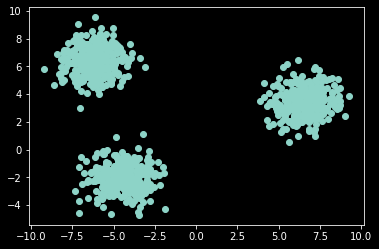

In [4]:
plt.scatter(X[:,0],X[:,1])

### splitting the data for training and testing:

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
print(len(X_train))
print(len(X_test))

670
330


### Importing KMeans algorithm:

In [7]:
from sklearn.cluster import KMeans

#### Implementing elblow method to find the k-value:

In [8]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

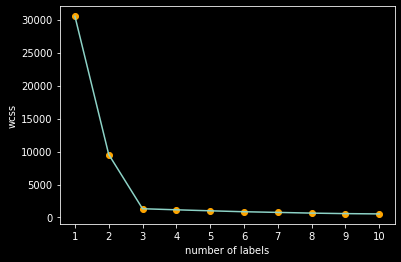

In [9]:
plt.scatter(range(1,11),wcss,color='orange')
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('number of labels')
plt.ylabel('wcss')
plt.show()

From the data, it is evident that k=3

In [10]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_label=kmeans.fit_predict(X_train)

C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


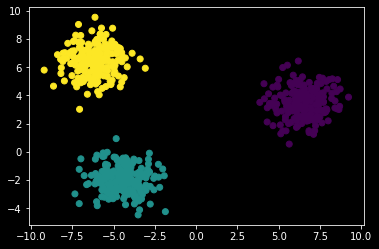

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

In [12]:
y_test_pred=kmeans.predict(X_test)

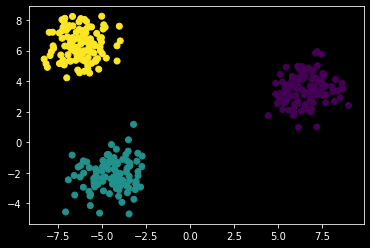

In [13]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_pred)

### Using Kneed locator:

In [14]:
!pip install kneed


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from kneed import KneeLocator

In [16]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3